In [16]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from simulation import Data, Submission, Tournament, round_names

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
# Initiate data class to get files
mw = 'M'
ncaa_data = Data(mw, dir='./input_with_data/')
season = 2021
# read and initialize submission class
df = pd.read_csv('./input_with_data/submission.csv')
submission = Submission(sub_df=df, data=ncaa_data)

# initiate a tournament object
tourney = Tournament(data=ncaa_data, submission=submission, season=season)

# Now what can these do?
## Data class
Pass this to the other two classes. It handles retrieval of all the necessary data. Can get data for mens or womens kaggle competitions

## The Submission Class
The submission class will add some more information to your simple submission file like the round a game takes place in. It also has a method to look up predictions by team names or IDs.

In [20]:
submission.df.head(2)

,Season,Round,Team1ID,Team2ID,Pred,PredData
ID,,,,,,
2016_1112_1114,2016,6,1112,1114,0.634206,63.4% chance of Arizona beating Ark Little Rock
2016_1112_1122,2016,4,1112,1122,0.942213,94.2% chance of Arizona beating Austin Peay


more interestingly...

In [21]:
pred = submission.df.iloc[0,2]
# pred.s_dict_rev

In [22]:
submission.df.head(2)

,Season,Round,Team1ID,Team2ID,Pred,PredData
ID,,,,,,
2016_1112_1114,2016,6,1112,1114,0.634206,63.4% chance of Arizona beating Ark Little Rock
2016_1112_1122,2016,4,1112,1122,0.942213,94.2% chance of Arizona beating Austin Peay


the round names can be found in a dictionary at the top of the Python code. Now how about predictions?

In [23]:
pred = submission.get_pred_by_teams(season=2021, t1_name='Houston', t2_name='Ohio')
pred

88.2% chance of Houston beating Ohio

this predictiction class has methods to do things like randomly pick a winner based on the prediction

In [24]:
pred.get_favored(), pred.t1_id, pred.t1_name

(1222, 1222, 'Houston')

## The Tournament Class
The tournament class is built on top of the prediction classes and gives some simulation options and ways to calculate expected losses or tournament odds, like the odds to make the championship.

The first simple example is using a dictionary of game slots and winning team IDs stored in the python code to load historic tournament results to compare our submission to. I am planning on updating these dictionary values for 2022 as the tournament progresses

In [25]:
tourney.get_historic_results()

The results are loaded and below we see that Baylor beat Gonzaga to win the 2021 tournament.

In [26]:
tourney.summary_to_df().head()

,Team,Play-in Games,First Round,Round of 32,Sweet 16,Elite 8,Final 4,Championship
TeamID,,,,,,,,
1124,Z01 - Baylor,0.0,1.0,1.0,1.0,1.0,1.0,1.0
1211,X01 - Gonzaga,0.0,1.0,1.0,1.0,1.0,1.0,0.0
1417,W11b - UCLA,1.0,1.0,1.0,1.0,1.0,0.0,0.0
1222,Y02 - Houston,0.0,1.0,1.0,1.0,1.0,0.0,0.0
1116,Z03 - Arkansas,0.0,1.0,1.0,1.0,0.0,0.0,0.0


Below are the losses. I am dropping the last 4 which are play-in games. There was also one cancelled game in the 2021 tournament that is not appropriately reflected in the losses here. That game was slot `R1X4`. If we omit all of those we can perfectly match my kaggle score from last year.

In [27]:
no_play_ins = tourney.losses[:-4]
true_loss = no_play_ins.loc[~(no_play_ins.index=='R1X4')].mean()
true_loss

0.6140536266516983

Let's try some simulations - first we will just take the favored team in each slot

In [28]:
tourney.reset_tournament()
tourney.simulate_tournament('chalk') 
tourney.summary_to_df().head()


,Team,Play-in Games,First Round,Round of 32,Sweet 16,Elite 8,Final 4,Championship
TeamID,,,,,,,,
1124,Z01 - Baylor,0.0,1.0,1.0,1.0,1.0,1.0,1.0
1211,X01 - Gonzaga,0.0,1.0,1.0,1.0,1.0,1.0,0.0
1228,Y01 - Illinois,0.0,1.0,1.0,1.0,1.0,0.0,0.0
1276,W01 - Michigan,0.0,1.0,1.0,1.0,1.0,0.0,0.0
1116,Z03 - Arkansas,0.0,1.0,1.0,1.0,0.0,0.0,0.0


or we can randomize it

In [29]:
tourney.reset_tournament()
tourney.simulate_tournament('random', seed=13) 
tourney.summary_to_df().head()

,Team,Play-in Games,First Round,Round of 32,Sweet 16,Elite 8,Final 4,Championship
TeamID,,,,,,,,
1124,Z01 - Baylor,0.0,1.0,1.0,1.0,1.0,1.0,1.0
1104,W02 - Alabama,0.0,1.0,1.0,1.0,1.0,1.0,0.0
1361,Y06 - San Diego St,0.0,1.0,1.0,1.0,1.0,0.0,0.0
1211,X01 - Gonzaga,0.0,1.0,1.0,1.0,1.0,0.0,0.0
1403,Z06 - Texas Tech,0.0,1.0,1.0,1.0,0.0,0.0,0.0


or we can run a simulation that will track our expected outcomes and losses

In [30]:
n_sim = 500
results, expected_losses = tourney.simulate_tournaments(n_sim)

KeyboardInterrupt: 

Let's visualize the team performance by round from the simulation

In [ ]:

results.head(10)

,Team,Play-in Games,First Round,Round of 32,Sweet 16,Elite 8,Final 4,Championship
TeamID,,,,,,,,
1211,X01 - Gonzaga,0.0,490,451.0,387.0,305.0,234.0,168.0
1124,Z01 - Baylor,0.0,482,406.0,346.0,260.0,195.0,117.0
1104,W02 - Alabama,0.0,469,380.0,300.0,194.0,76.0,39.0
1228,Y01 - Illinois,0.0,484,305.0,210.0,136.0,66.0,29.0
1234,X02 - Iowa,0.0,463,317.0,220.0,88.0,47.0,29.0
1222,Y02 - Houston,0.0,456,356.0,250.0,128.0,59.0,23.0
1276,W01 - Michigan,0.0,460,318.0,220.0,127.0,48.0,21.0
1116,Z03 - Arkansas,0.0,400,277.0,198.0,94.0,47.0,21.0
1361,Y06 - San Diego St,0.0,316,206.0,96.0,46.0,16.0,5.0


In [ ]:
odds = results.copy()
odds.iloc[:,1:] = (results.iloc[:,1:]  / n_sim)
odds.head(10)

,Team,Play-in Games,First Round,Round of 32,Sweet 16,Elite 8,Final 4,Championship
TeamID,,,,,,,,
1211,X01 - Gonzaga,0.0,0.980,0.902,0.774,0.610,0.468,0.336
1124,Z01 - Baylor,0.0,0.964,0.812,0.692,0.520,0.390,0.234
1104,W02 - Alabama,0.0,0.938,0.760,0.600,0.388,0.152,0.078
1228,Y01 - Illinois,0.0,0.968,0.610,0.420,0.272,0.132,0.058
1234,X02 - Iowa,0.0,0.926,0.634,0.440,0.176,0.094,0.058
1222,Y02 - Houston,0.0,0.912,0.712,0.500,0.256,0.118,0.046
1276,W01 - Michigan,0.0,0.920,0.636,0.440,0.254,0.096,0.042
1116,Z03 - Arkansas,0.0,0.800,0.554,0.396,0.188,0.094,0.042
1361,Y06 - San Diego St,0.0,0.632,0.412,0.192,0.092,0.032,0.010


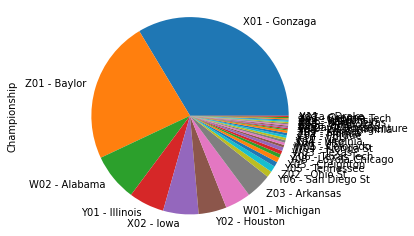

In [ ]:
odds.set_index('Team')['Championship'].plot(kind='pie')
plt.axis('equal')
plt.show()

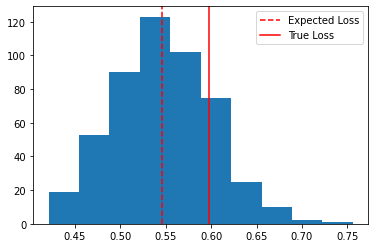

In [ ]:
plt.hist(expected_losses)
plt.axvline(np.array(expected_losses).mean(), color='r', linestyle='--', label='Expected Loss')
plt.axvline(true_loss, color='r', linestyle='-', label='True Loss')
plt.legend()